# Assignment 5. Poisson distribution
Probability and Statistics<br>
11.12.2021<br>
G01, Ahmed Al-Tuwaijari<br>
[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/4.0/),
[Sakari Lukkarinen](https://peoplefinder.metropolia.fi/en/profile/8719/staff/Sakari-Lukkarinen)<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en/)


In [1]:
# Import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
import seaborn as sns
from numpy import random
from scipy.stats import norm 
%pylab inline
from scipy.stats import poisson
import numpy.random as rnd

Populating the interactive namespace from numpy and matplotlib


/Users/ahmedphone/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Problem 1

1. Generate 10,000 random numbers from *Poission distribution* having mean value of 50. Make a histogram of the values. Pay special attention to the bins parameter.
1. Calculate the mean and standard deviation values for the generated random numbers.
1. Generate 10,000 random numbers from *normal distribution* having the same mean and standard deviation as for the Poisson distribution.
1. Overlap the histograms of the generated data (Poisson and normal distribution).
1. How much do they differ? Explain why.

mean =  50.05
std  =   7.09
bins  =  32.00


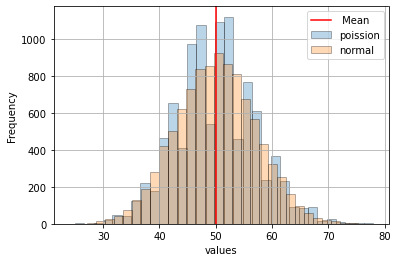

In [2]:
n = 10000
samples = np.random.poisson(lam=50, size=(10000))
mean = samples.mean()
std = samples.std()
print(f'mean = {mean:6.2f}')
print(f'std  = {std:6.2f}')
k = round(1 + 3.322*log(n))
print(f'bins  = {k:6.2f}')
plt.hist(samples, edgecolor='black', bins = k, alpha = 0.3 ,label='poission')
plt.axvline(x=mean, c='red', label=' Mean')
mu = mean
sigma = std
data = np.random.normal(loc=mu, scale=sigma, size=10000)
plt.hist(data,edgecolor='black', bins = k, alpha = 0.3, label='normal')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

In [3]:
print('Poission: ')
dframe = pd.DataFrame(data)
dframe.describe()

Poission: 


,0
count,10000.000000
mean,50.057192
std,7.069828
min,23.912004
25%,45.276173
50%,50.039966
75%,54.761473
max,75.315118


/Users/ahmedphone/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ahmedphone/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


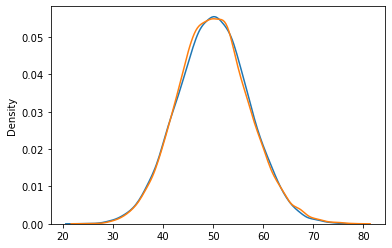

In [4]:
from numpy import random


sns.distplot(data, hist=False, label='normal')
sns.distplot(samples, hist=False, label='poisson')

plt.show()

Answer:
From the histgrams and the descriptive statistics of the possion distribution they deffer marginly because they share same mean and std.

## Problem 2

In this problem the aim is to simulate the functioning of [mobile x-ray imaging device](https://www.siemens-healthineers.com/radiography/mobile-x-ray/mobilett-elara-max). The x-ray detector ([MAX wi-D, see Table 3, Trixell Pixium 3543 EZh](https://www.accessdata.fda.gov/cdrh_docs/pdf18/K181279.pdf)) used in this device has 

- size of 348 mm x 424 mm
- resolution of 2350 x 2866 pixels
- acquisition depth as 16 bit ([see color depth in Wikipedia](https://en.wikipedia.org/wiki/Color_depth)).

Imagine that you are studying 9 pieces of 2.0 inch x 2.0 inch sized test images acquired with the x-ray imaging device using a [test phantom](https://quart.de/en/products/test-phantoms/radiography/quart-sp-digi). Each of the test images have different mean brightness. The brightness for each piece is [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.10, 0.20, 0.50] of the full-scale resolution (2^16).

1. Write a code that simulates grayscale x-ray images pieces having different brightness. You can use *Poisson distribution* to generate random values for the test images.
1. Show the pieces in [one figure using subplots](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html). 
1. Calculate the mean, the standard deviation, and the [signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) values of the brightness for each piece.
1. Plot how the signal-to-noise ratio against the brightness (x-axis = brightness, y-axis = SNR-ratio). 
1. Explain and discuss about your results.

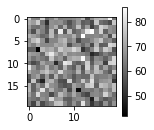

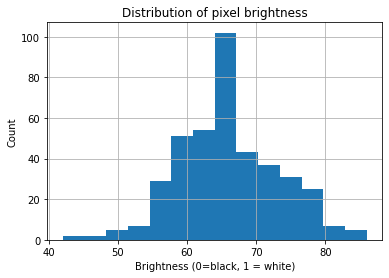

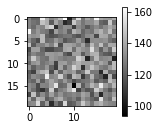

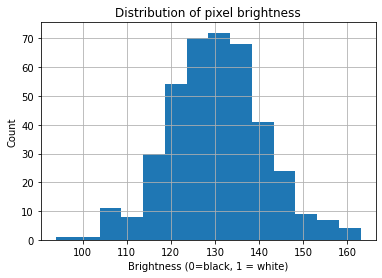

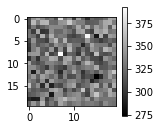

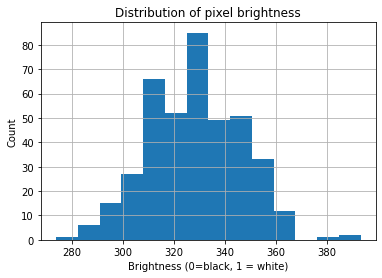

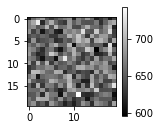

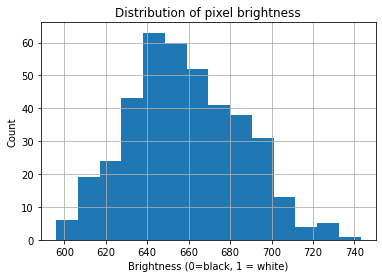

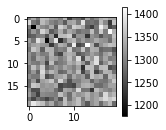

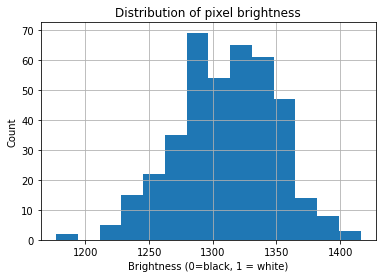

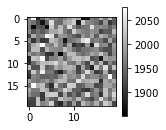

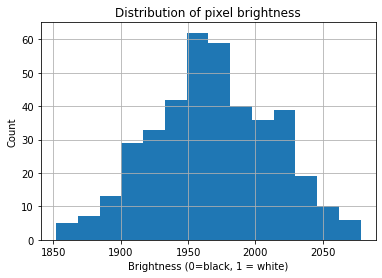

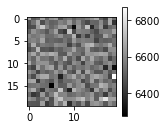

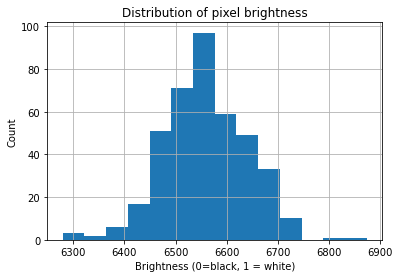

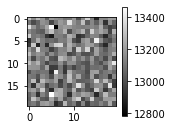

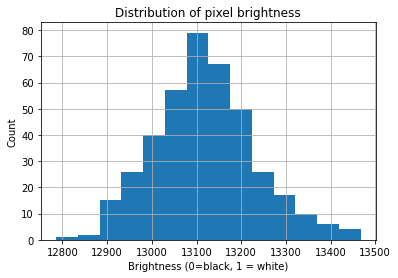

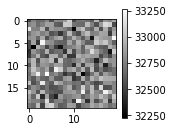

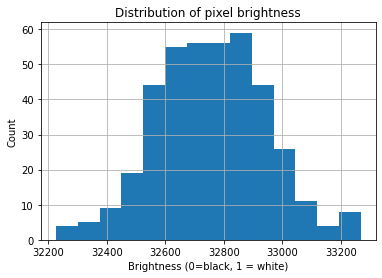

In [5]:
arr = np.array([0.001, 0.002, 0.005, 0.01,0.02, 0.03, 0.10, 0.20, 0.50])
i = 0
images = []
image_arr = np.empty([9, 2], dtype=int) 
for x in range(9):    
    
    
    m1 = arr[i] * 2**16
    image1 = poisson.rvs(m1, size = (20, 20))
    #image_arr[i] = image1
    images.append(image1)
    
    
    figure(figsize = (2, 2))
    imshow(image1, cmap = 'gray')
    colorbar()
    
    #subplot(1,2, 2)
    data = image1.flatten()
    figure()
    hist(data, bins=14)
    xlabel('Brightness (0=black, 1 = white)')
    ylabel('Count')
    title('Distribution of pixel brightness');
    grid()
    i= i +1
    image1=0

show()


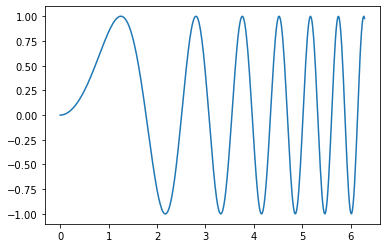

In [6]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, ax = plt.subplots()
ax.plot(x, y)


In [ ]:
x = []
y = []
for i in images:
    
    x1 = i.flatten()
    m1 = np.mean(x1)
    x.append(m1)
    sd1 = np.std(x1)
    snr1 = np.mean(x1)/np.std(x1)
    y.append(snr1)
    #print('Image 1:')
    print(f'mean = {m1:6.2f}')
    print(f'std  = {sd1:6.2f}')
    print(f'SNR  = {snr1:6.2f}')
    print('-------------------')
    plot(x, y)
    
xlabel('Average brightness')
ylabel('Signal-to-noise Ratio')
grid()

Answer: when brightness increases the signal to noise ratio increases

## Problem 3

1. Take series of photos of a smooth wall in different lighting (from dim to full light) conditions.
   - [Example 1](https://static01.nyt.com/images/2019/04/16/style/04lighting-wall-washer/XXlighting-images-slide-S4YJ-superJumbo.jpg?quality=75&auto=webp)
   - [Example 2](https://thehomesihavemade.com/wp-content/uploads/2016/10/Does-Wallpaper-Work-on-Textured-Walls-03.jpg)
   - [Example 3](http://wrapitright.com/wp-content/uploads/Interior-Wall-Textures-Arlon-Graphics.jpg) 
1. Try and use [manual settings for the camera](http://www.mommatography.com/blog-page/printable-photography-cheat-sheet): 
   - sensitivity (e.g. [film speed](https://en.wikipedia.org/wiki/Film_speed#ISO), for example ISO 800) 
   - [exposure](https://en.wikipedia.org/wiki/Exposure_(photography)) (amount of light that reaches the camera's sensor)
   - [aperture](https://en.wikipedia.org/wiki/F-number)
   - [shutter speeds](https://en.wikipedia.org/wiki/Shutter_speed) 
1. Select parts of the photos where the illumination is as smooth as possible. 
1. Convert the photos to grayscale and calculate the mean, the standard devation, and the SNR-values for the selected parts.
1. Study how well  the SNR-to-shot-noise -rule ($SNR \approx \sqrt{N}$) apply for this experiment. 
1. Explain and discuss about the results.

In [ ]:

# We need image processing library, more details see: http://scikit-image.org/
import skimage.io as skio

# The url address to find the image
fpath = 'https://static01.nyt.com/images/2019/04/16/style/04lighting-wall-washer/XXlighting-images-slide-S4YJ-superJumbo.jpg?quality=75&auto=webp'

# Filename for ISO 3200 image
fname = '5DIII-3200.jpg'
# Another ISO speed example for exploring the code
# fname = '5DIII-200.jpg' 

# Read the image
image = skio.imread(fpath + fname)

# Show it in large figure
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xlabel('x-index')
plt.ylabel('y-index');

In [ ]:
# What are the shape and the dimensions of that image?
print(f'shape = {image.shape} dimensions = {image.ndim}')

In [ ]:
# Next we convert the original color image to gray-image

# Import needed submodule 
import skimage.color as skcolor

# Convert to gray-scale image
grayimage = skcolor.rgb2gray(image)

# Show the results
plt.figure(figsize=(10,10))
plt.imshow(grayimage, cmap='gray')
plt.xlabel('x-index')
plt.ylabel('y-index')
plt.show()

In [ ]:
# What are the shape and dimensions of the 1-channel gray-color image?
print(f'shape = {grayimage.shape} dimensions {grayimage.ndim}')

In [ ]:
# Select the part from the image where the gray-scale test strips locate
image_part = grayimage[600:800, 500:700]

# Show the test strips part.
figure(figsize=(10,10))
imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
title('Gray-scale test strips.')
xlabel('x-index')
ylabel('y-index')
show()

In [ ]:
x1 = image_part.flatten()
m1 = np.mean(x1)
sd1 = np.std(x1)
snr1 = np.mean(x1)/np.std(x1)
#print('Image 1:')
print(f'mean = {m1:6.2f}')
print(f'std  = {sd1:6.2f}')
print(f'SNR  = {snr1:6.2f}')

Answer:( 𝑆𝑁𝑅≈𝑁*0.5 ) rule looks not so accurate 